# Credit Default Risk Prediction with Machine Learning # Risk Behavior Features Analysis

In [1]:
# import dependenices

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C://Users//shaik//Downloads//risk_behavior_features.csv")

In [4]:
df.head()

,Age,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Employment Status,Years in Current Job
0,36,Female,Bachelor's,Divorced,2,56789,715,0.25,158765,2,Employed,6
1,37,Non-binary,Master's,Single,3,91234,789,0.18,176543,0,Employed,10
2,45,Male,Bachelor's,Divorced,1,65432,723,0.25,134567,1,Employed,6
3,39,Male,Master's,Single,0,92345,801,0.15,192345,0,Employed,10
4,40,Female,Master's,Married,1,76543,756,0.22,162345,0,Employed,8


In [5]:
df.shape

(73, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   73 non-null     int64  
 1   Gender                73 non-null     object 
 2   Education Level       73 non-null     object 
 3   Marital Status        73 non-null     object 
 4   Number of Dependents  73 non-null     int64  
 5   Income                73 non-null     int64  
 6   Credit Score          73 non-null     int64  
 7   Debt-to-Income Ratio  73 non-null     float64
 8   Assets Value          73 non-null     int64  
 9   Defaults Records      73 non-null     int64  
 10  Employment Status     73 non-null     object 
 11  Years in Current Job  73 non-null     int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 7.0+ KB


In [7]:
df.isnull().sum()

Age                     0
Gender                  0
Education Level         0
Marital Status          0
Number of Dependents    0
Income                  0
Credit Score            0
Debt-to-Income Ratio    0
Assets Value            0
Defaults Records        0
Employment Status       0
Years in Current Job    0
dtype: int64

In [8]:
df.describe()

,Age,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Years in Current Job
count,73.000000,73.00000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,39.410959,1.60274,68188.643836,699.260274,0.288082,146890.287671,1.232877,7.410959
std,10.531481,1.25543,25709.974343,75.362094,0.126586,50949.713240,1.296583,3.915197
min,21.000000,0.00000,3512.000000,550.000000,0.110000,20626.000000,0.000000,0.000000
25%,32.000000,1.00000,54754.000000,634.000000,0.190000,114375.000000,0.000000,5.000000
50%,38.000000,2.00000,70978.000000,725.000000,0.240000,156630.000000,1.000000,9.000000
75%,48.000000,3.00000,85000.000000,755.000000,0.390000,172345.000000,2.000000,10.000000
max,69.000000,4.00000,117392.000000,801.000000,0.580000,282006.000000,4.000000,16.000000


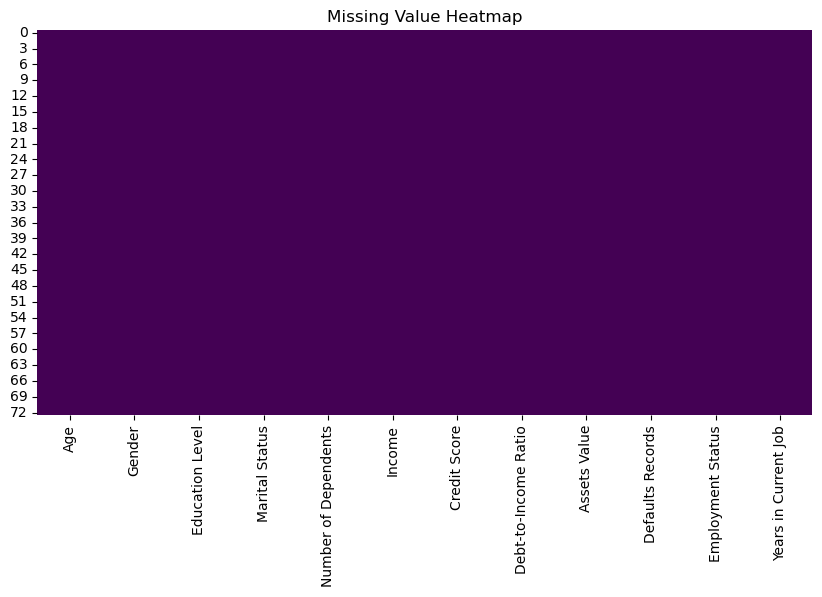

In [9]:
# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

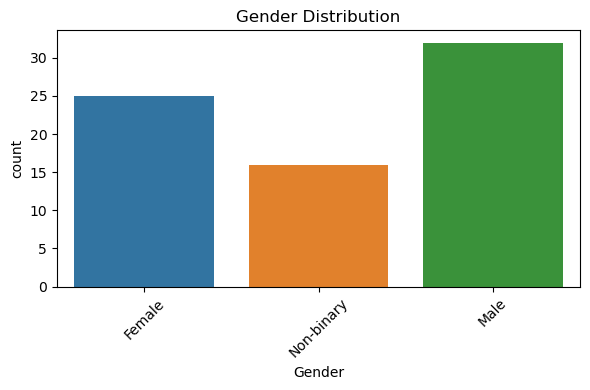

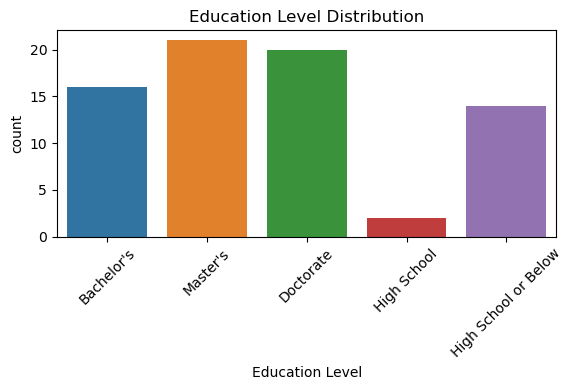

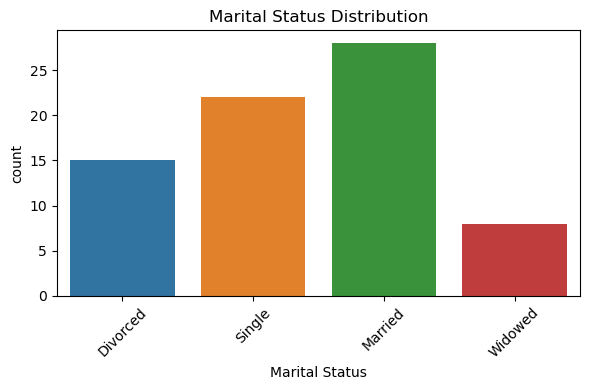

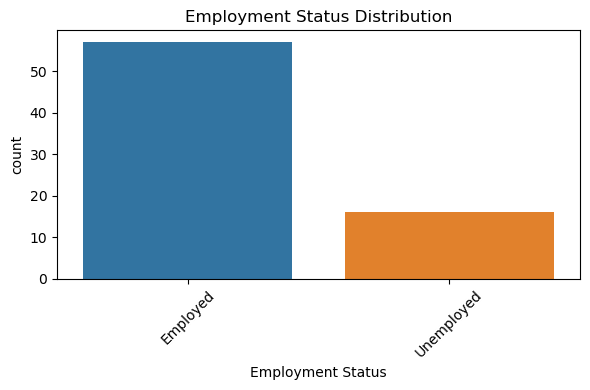

In [10]:
# Countplot for categorical variables
categorical_cols = ['Gender', 'Education Level', 'Marital Status', 'Employment Status']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

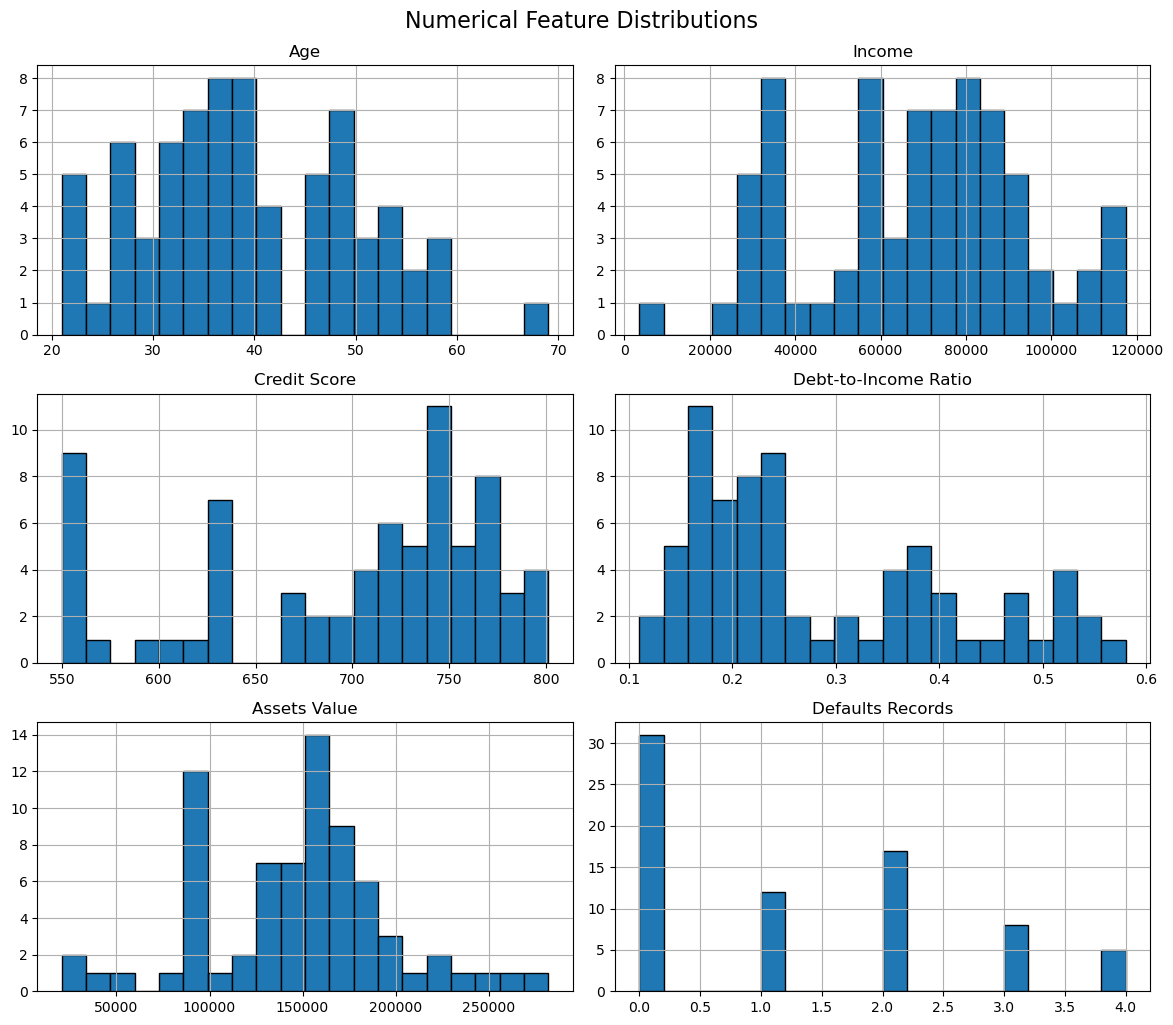

In [11]:
# Histograms for numerical features
numeric_cols = ['Age', 'Income', 'Credit Score', 'Debt-to-Income Ratio', 'Assets Value', 'Defaults Records']

df[numeric_cols].hist(bins=20, figsize=(12, 10), layout=(3, 2), edgecolor='black')
plt.tight_layout()
plt.suptitle("Numerical Feature Distributions", fontsize=16, y=1.02)
plt.show()

<Axes: >

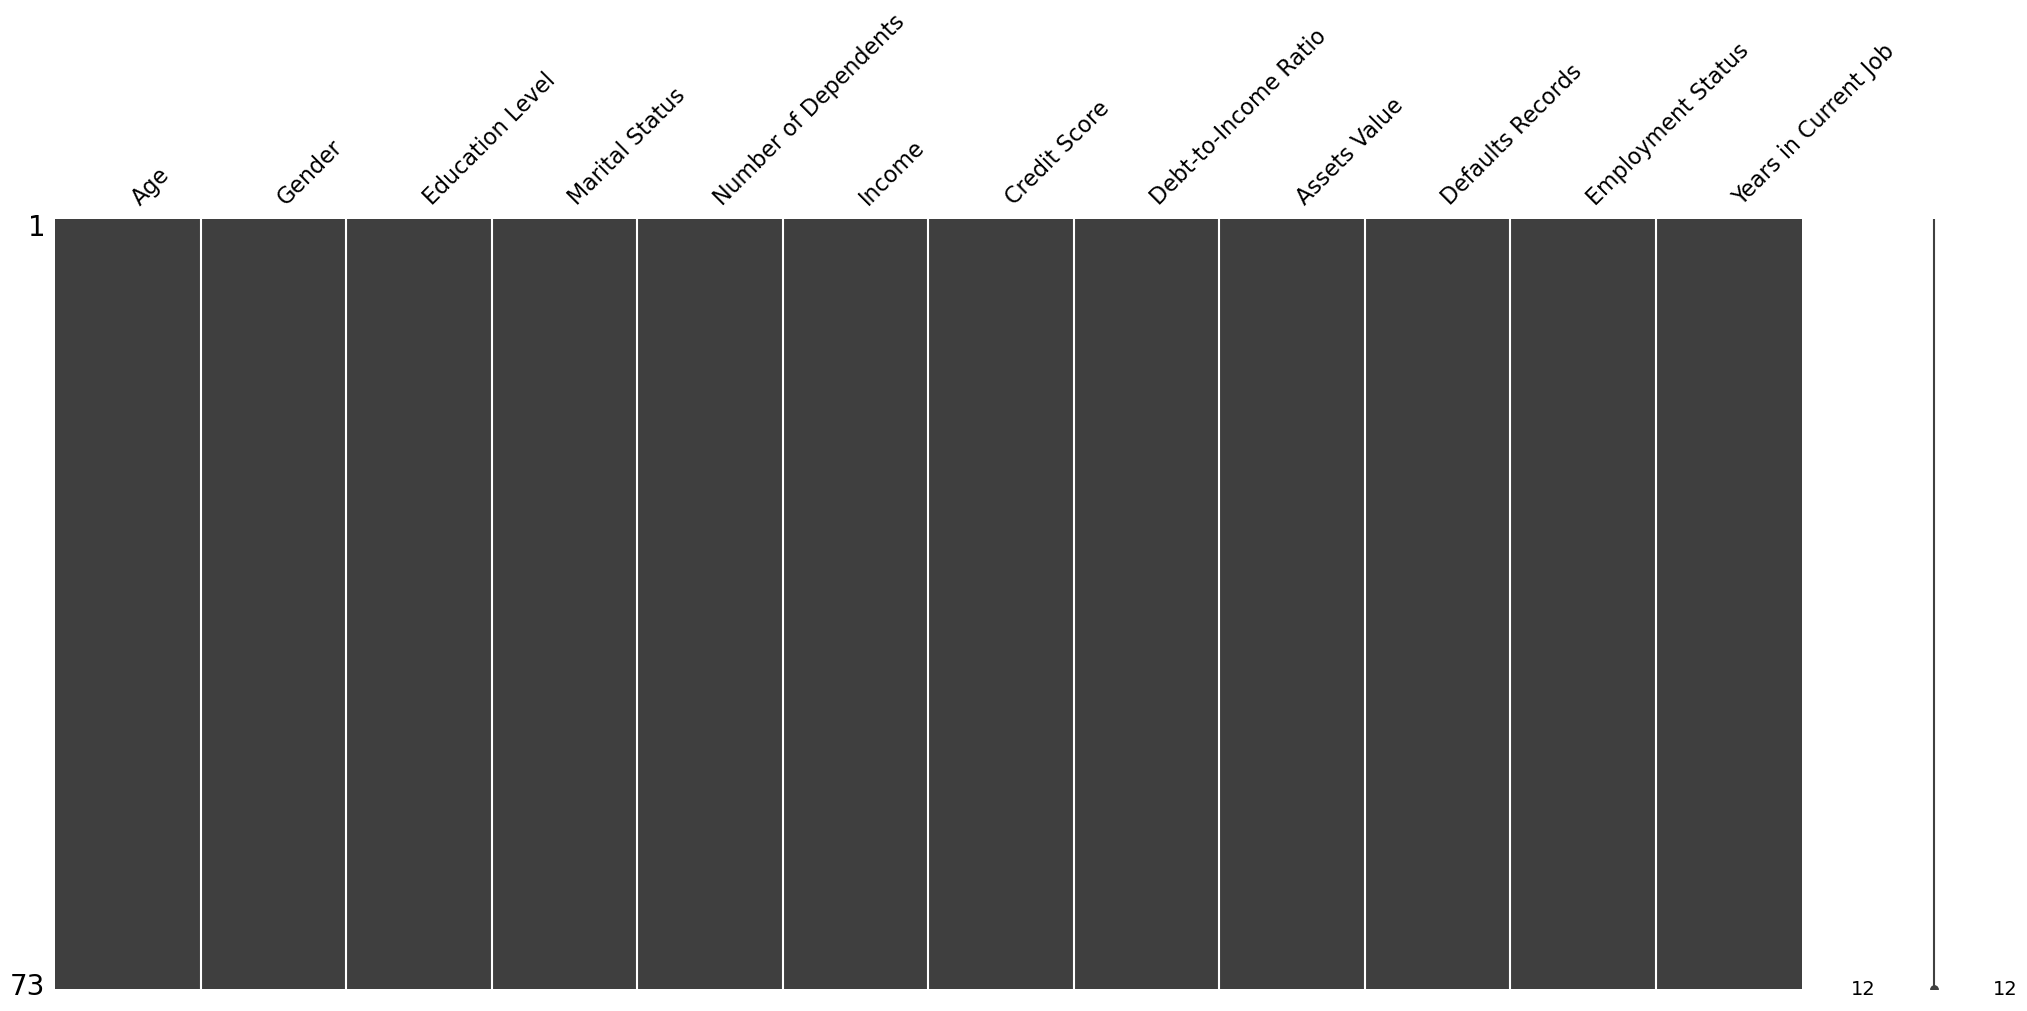

In [12]:
import missingno as msno

msno.matrix(df)

In [13]:
# 1. Create target column: 1 if customer defaulted, else 0
df['Defaulted'] = df['Defaults Records'].apply(lambda x: 1 if x > 0 else 0)

# 2. Drop the original Defaults Records column
df = df.drop('Defaults Records', axis=1)


In [14]:
df.head()

,Age,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Employment Status,Years in Current Job,Defaulted
0,36,Female,Bachelor's,Divorced,2,56789,715,0.25,158765,Employed,6,1
1,37,Non-binary,Master's,Single,3,91234,789,0.18,176543,Employed,10,0
2,45,Male,Bachelor's,Divorced,1,65432,723,0.25,134567,Employed,6,1
3,39,Male,Master's,Single,0,92345,801,0.15,192345,Employed,10,0
4,40,Female,Master's,Married,1,76543,756,0.22,162345,Employed,8,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   73 non-null     int64  
 1   Gender                73 non-null     object 
 2   Education Level       73 non-null     object 
 3   Marital Status        73 non-null     object 
 4   Number of Dependents  73 non-null     int64  
 5   Income                73 non-null     int64  
 6   Credit Score          73 non-null     int64  
 7   Debt-to-Income Ratio  73 non-null     float64
 8   Assets Value          73 non-null     int64  
 9   Employment Status     73 non-null     object 
 10  Years in Current Job  73 non-null     int64  
 11  Defaulted             73 non-null     int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 7.0+ KB


In [16]:
df.select_dtypes(include ='number').columns

Index(['Age', 'Number of Dependents', 'Income', 'Credit Score',
       'Debt-to-Income Ratio', 'Assets Value', 'Years in Current Job',
       'Defaulted'],
      dtype='object')

In [17]:
num_colum = ['Age', 'Number of Dependents', 'Income', 'Credit Score',
       'Debt-to-Income Ratio', 'Assets Value', 'Years in Current Job']

In [18]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

In [19]:
for i in num_colum:
    minmax.fit(df[[i]])
    df[i] = minmax.transform(df[[i]])

In [20]:
df.head(2)

,Age,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Employment Status,Years in Current Job,Defaulted
0,0.312500,Female,Bachelor's,Divorced,0.50,0.467835,0.657371,0.297872,0.528499,Employed,0.375,1
1,0.333333,Non-binary,Master's,Single,0.75,0.770302,0.952191,0.148936,0.596515,Employed,0.625,0


In [21]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Education Level', 'Marital Status', 'Employment Status'], dtype='object')

In [22]:
dfg = pd.get_dummies(df['Gender']).astype(int)
df = pd.concat([df,dfg], axis= 1)
df = df.drop(columns=['Gender'])

In [23]:
dfe = pd.get_dummies(df['Education Level']).astype(int)
df = pd.concat([df,dfe], axis= 1)
df = df.drop(columns=['Education Level'])

In [24]:
dfm = pd.get_dummies(df['Marital Status']).astype(int)
df = pd.concat([df,dfm], axis= 1)
df = df.drop(columns=['Marital Status'])

In [25]:
dfem = pd.get_dummies(df['Employment Status']).astype(int)
df = pd.concat([df,dfem], axis= 1)
df = df.drop(columns=['Employment Status'])

In [26]:
df.head(2)

,Age,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Years in Current Job,Defaulted,Female,Male,...,Doctorate,High School,High School or Below,Master's,Divorced,Married,Single,Widowed,Employed,Unemployed
0,0.312500,0.50,0.467835,0.657371,0.297872,0.528499,0.375,1,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0.333333,0.75,0.770302,0.952191,0.148936,0.596515,0.625,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   73 non-null     float64
 1   Number of Dependents  73 non-null     float64
 2   Income                73 non-null     float64
 3   Credit Score          73 non-null     float64
 4   Debt-to-Income Ratio  73 non-null     float64
 5   Assets Value          73 non-null     float64
 6   Years in Current Job  73 non-null     float64
 7   Defaulted             73 non-null     int64  
 8   Female                73 non-null     int32  
 9   Male                  73 non-null     int32  
 10  Non-binary            73 non-null     int32  
 11  Bachelor's            73 non-null     int32  
 12  Doctorate             73 non-null     int32  
 13  High School           73 non-null     int32  
 14  High School or Below  73 non-null     int32  
 15  Master's              73 

In [28]:
df.shape

(73, 22)

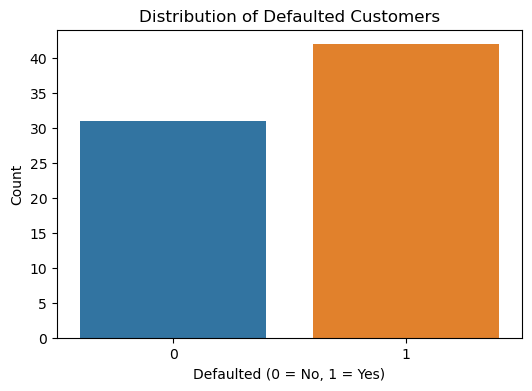

In [29]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Defaulted', data=df)
plt.title('Distribution of Defaulted Customers')
plt.xlabel('Defaulted (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


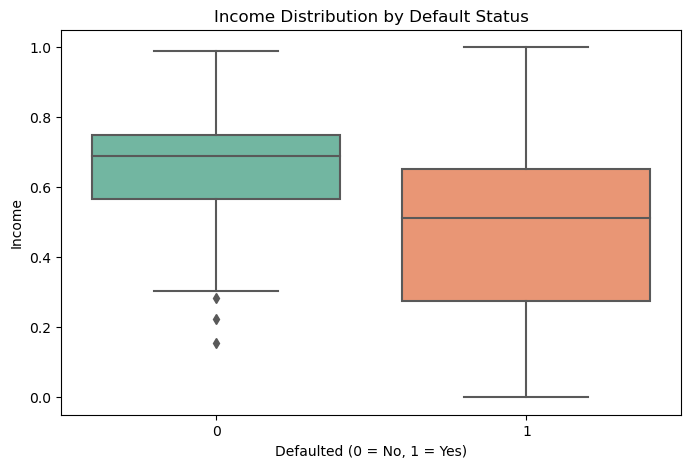

In [30]:
# Boxplot: Income vs Defaulted
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Defaulted', y='Income', palette='Set2')
plt.title('Income Distribution by Default Status')
plt.xlabel('Defaulted (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.show()

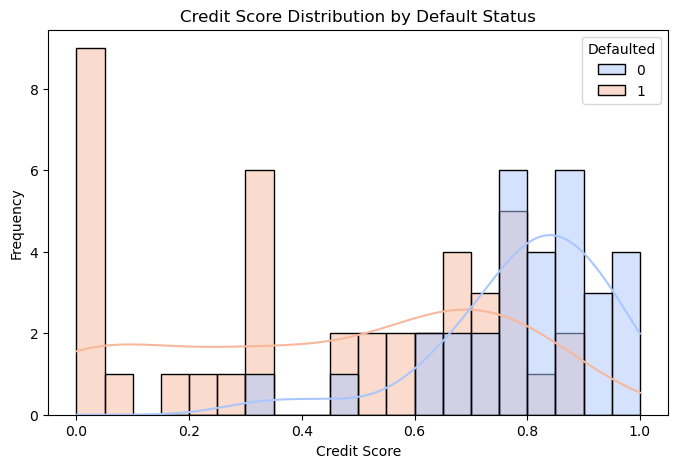

In [31]:
#Histplot: Credit Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Credit Score', hue='Defaulted', bins=20, kde=True, palette='coolwarm')
plt.title('Credit Score Distribution by Default Status')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

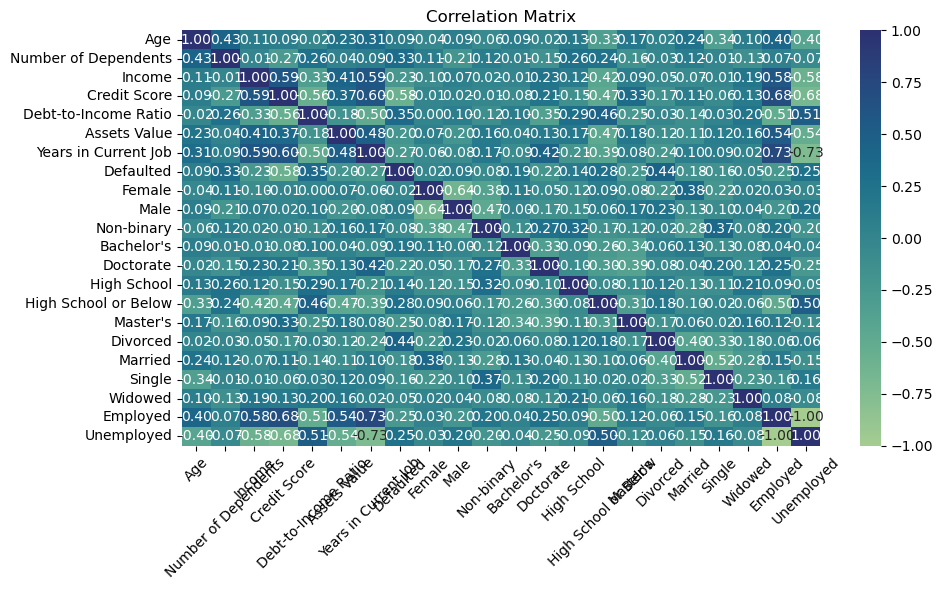

In [32]:
#Heatmap: Feature Correlation
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='crest', center=0)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
df.columns

Index(['Age', 'Number of Dependents', 'Income', 'Credit Score',
       'Debt-to-Income Ratio', 'Assets Value', 'Years in Current Job',
       'Defaulted', 'Female', 'Male', 'Non-binary', 'Bachelor's', 'Doctorate',
       'High School', 'High School or Below', 'Master's', 'Divorced',
       'Married', 'Single', 'Widowed', 'Employed', 'Unemployed'],
      dtype='object')

In [34]:
X = [['Age', 'Number of Dependents', 'Income', 'Credit Score', 'Debt-to-Income Ratio',
     'Assets Value', 'Years in Current Job', 'Female', 'Male', 'Non-binary',
     "Bachelor's", 'Doctorate', 'High School', 'High School or Below', "Master's",
     'Divorced', 'Married', 'Single', 'Widowed', 'Employed', 'Unemployed']]

In [35]:
y = ['Defaulted']

In [36]:
# Define the final feature set and target
X_final = df.drop('Defaulted', axis=1)
y = df['Defaulted']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

In [38]:
print(X_final.shape)  # Should show something like (73, number_of_features)
print(y.shape)        # Should show (73,)

(73, 21)
(73,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import classification_report

In [40]:
algorithms = [
    ('LogisticRegression',LogisticRegression()),
             ('DecisionTreeClassifier',DecisionTreeClassifier()),
             ('RandomForestClassifier',RandomForestClassifier()),
             ('SVC',SVC()),
             ('KNeighborsClassifier',KNeighborsClassifier()),
            ('ExtraTreeClassifier',ExtraTreeClassifier()),
        ('GaussianNB',GaussianNB()),
        ('SGDClassifier',SGDClassifier()),
        ('AdaBoostClassifier',AdaBoostClassifier()),
        ('GradientBoostingClassifier',GradientBoostingClassifier()),
        ('BaggingClassifier',BaggingClassifier())
]

In [41]:
from sklearn.metrics import classification_report

for name, model in algorithms:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n🔹 Model: {name}")
    print(classification_report(y_test, y_pred))


🔹 Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.78      0.78      0.78         9

    accuracy                           0.73        15
   macro avg       0.72      0.72      0.72        15
weighted avg       0.73      0.73      0.73        15


🔹 Model: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.64      0.78      0.70         9

    accuracy                           0.60        15
   macro avg       0.57      0.56      0.55        15
weighted avg       0.58      0.60      0.58        15


🔹 Model: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.67      0.89      0.76         9

    accuracy                           0.67        15
   macro avg       0.67      0.61

In [42]:
#  Model: KNeighborsClassifier accuary is 87%

In [43]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)

print("🔹 XGBoost Results")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

🔹 XGBoost Results


C:\Users\shaik\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [23:55:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


NameError: name 'confusion_matrix' is not defined

In [ ]:
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collect F1-scores
f1_scores = []

for name, model in algorithms:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    f1_scores.append((name, f1))

# Add XGBoost separately
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
f1_xgb = f1_score(y_test, y_pred_xgb, zero_division=0)
f1_scores.append(("XGBoost", f1_xgb))

# Convert to DataFrame and sort
f1_df = pd.DataFrame(f1_scores, columns=["Model", "F1 Score"]).sort_values(by="F1 Score", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=f1_df, x='F1 Score', y='Model', palette='coolwarm')
plt.title("F1 Score Comparison Across Models")
plt.xlim(0, 1)
plt.xlabel("F1 Score")
plt.ylabel("Classifier")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fit a Random Forest (or use an already trained one)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = pd.Series(rf_model.feature_importances_, index=X_final.columns)
top_features = importances.sort_values(ascending=False).head(10)

# Plot the top 10 features
plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='magma')
plt.title("Top 10 Most Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()